<a href="https://colab.research.google.com/github/Intelligent-Adaptive-Interventions-Lab/mha-data-analysis/blob/main/ACAI_Pilot_Bayesian_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)

 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [ ]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [ ]:
# PyMC3 for Bayesian Inference
import pymc3 as pm

In [ ]:
# Read 
df = pd.read_csv('cleaned-pilot-quant.csv')


df.head()

,user_id,is_high_mood,is_high_energy,has_history,arm_text,policy,reward
0,216.39.37.48,1,1,0,The following is a conversation with a coach. ...,uniform_random,1.00
1,73.217.235.200,0,0,1,The following is a conversation with a coach. ...,thompson_sampling_contextual,0.75
2,76.86.236.35,1,1,0,The following is a conversation with a coach. ...,uniform_random,1.00
3,107.5.25.36,1,1,0,The following is a conversation with a coach. ...,thompson_sampling_contextual,0.50
4,208.218.225.33,1,1,0,The following is a conversation with a coach. ...,thompson_sampling_contextual,1.00


In [ ]:
df.shape

(122, 7)

In [ ]:
df.dropna(axis=1, how='all')

,user_id,is_high_mood,is_high_energy,has_history,arm_text,policy,reward
0,216.39.37.48,1,1,0,The following is a conversation with a coach. ...,uniform_random,1.00
1,73.217.235.200,0,0,1,The following is a conversation with a coach. ...,thompson_sampling_contextual,0.75
2,76.86.236.35,1,1,0,The following is a conversation with a coach. ...,uniform_random,1.00
3,107.5.25.36,1,1,0,The following is a conversation with a coach. ...,thompson_sampling_contextual,0.50
4,208.218.225.33,1,1,0,The following is a conversation with a coach. ...,thompson_sampling_contextual,1.00
...,...,...,...,...,...,...,...
117,147.124.211.186,1,1,1,The following is a conversation with a coach. ...,uniform_random,0.50
118,216.39.37.240,1,1,1,The following is a conversation with a coach. ...,uniform_random,0.75
119,208.219.31.54,0,0,1,The following is a conversation with a coach. ...,uniform_random,0.25
120,170.39.187.32,0,1,0,The following is a conversation with a coach. ...,thompson_sampling_contextual,0.50


In [ ]:
df.describe()

,is_high_mood,is_high_energy,has_history,reward
count,122.000000,122.000000,122.000000,122.000000
mean,0.713115,0.762295,0.672131,0.657787
std,0.454173,0.427433,0.471373,0.350915
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.500000
50%,1.000000,1.000000,1.000000,0.750000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Print the value counts for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: user_id
63.161.77.18       2
63.160.189.194     2
208.218.227.95     2
208.218.224.244    2
68.169.164.252     2
                  ..
208.218.225.193    1
208.216.17.37      1
75.67.206.167      1
73.131.133.185     1
208.218.224.86     1
Name: user_id, Length: 117, dtype: int64

Column Name: arm_text
The following is a conversation with a coach. The coach asks open-ended reflection questions and helps the Human develop coping skills. The coach is optimistic, flexible, and empathetic.                                                                                                            49
The following is a conversation with a coach. The coach asks open-ended reflection questions and helps the Human develop coping skills. The coach has strong interpersonal skills.                                                                                                                    42
The following is a conversation with a coach. The coach asks open-ended reflection questi

In [ ]:
df['reward'].describe()

count    122.000000
mean       0.657787
std        0.350915
min        0.000000
25%        0.500000
50%        0.750000
75%        1.000000
max        1.000000
Name: reward, dtype: float64

In [ ]:
df['reward'].value_counts()

1.00    43
0.75    35
0.50    18
0.00    18
0.25     8
Name: reward, dtype: int64

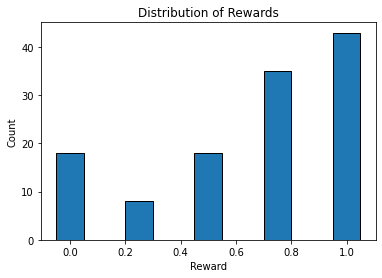

In [ ]:
# Bar plot
plt.bar(df['reward'].value_counts().index, 
        df['reward'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width=0.1)
plt.xlabel('Reward'); plt.ylabel('Count'); plt.title('Distribution of Rewards');
# plt.xticks(list(range(5, 20)));

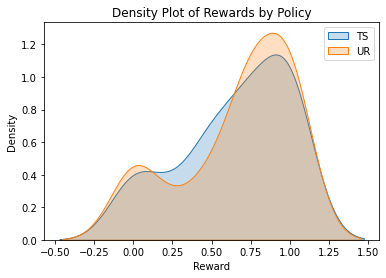

In [ ]:
# Reward distribution by policy
sns.kdeplot(df.loc[df['policy'] == 'thompson_sampling_contextual', 'reward'], label = 'TS', shade = True)
sns.kdeplot(df.loc[df['policy'] == 'uniform_random', 'reward'], label = 'UR', shade = True)
plt.xlabel('Reward'); plt.ylabel('Density'); plt.title('Density Plot of Rewards by Policy');
plt.legend()

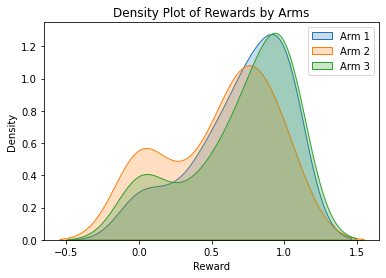

In [ ]:
# Reward distribution by arms
sns.kdeplot(df.loc[df['arm_text'] == 'The following is a conversation with a coach. The coach asks open-ended reflection questions and helps the Human develop coping skills. The coach has strong interpersonal skills.', 'reward'], label = 'Arm 1', shade = True)
sns.kdeplot(df.loc[df['arm_text'] == 'The following is a conversation with a coach. The coach asks open-ended reflection questions and helps the Human develop coping skills. The coach is trustworthy, is an active listener, and is empathetic. The coach offers supportive and helpful attention, with no expectation of reciprocity.', 'reward'], label = 'Arm 2', shade = True)
sns.kdeplot(df.loc[df['arm_text'] == 'The following is a conversation with a coach. The coach asks open-ended reflection questions and helps the Human develop coping skills. The coach is optimistic, flexible, and empathetic.', 'reward'], label = 'Arm 3', shade = True)
plt.xlabel('Reward'); plt.ylabel('Density'); plt.title('Density Plot of Rewards by Arms');
plt.legend()

In [ ]:
# Correlations of numerical values
df.corr()['reward'].sort_values()

is_high_energy    0.031727
is_high_mood      0.221553
has_history       0.252886
reward            1.000000
Name: reward, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


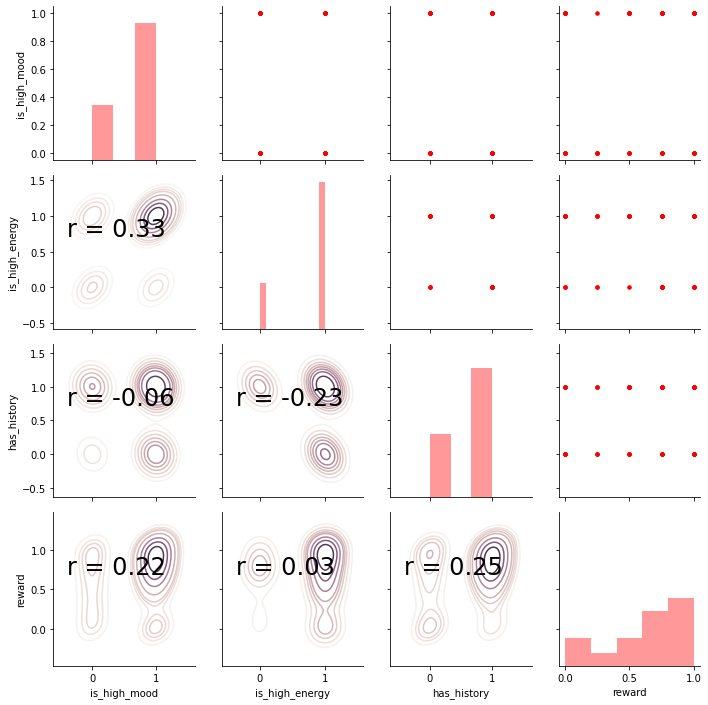

In [ ]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [ ]:
formula = 'reward ~ is_high_mood + is_high_energy + has_history + policy + has_history'
formula

'reward ~ is_high_mood + is_high_energy + has_history + policy + has_history'

In [ ]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500, cores=-1)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, has_history, is_high_energy, is_high_mood, policy[T.unifor

Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 14 seconds.


In [ ]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or 

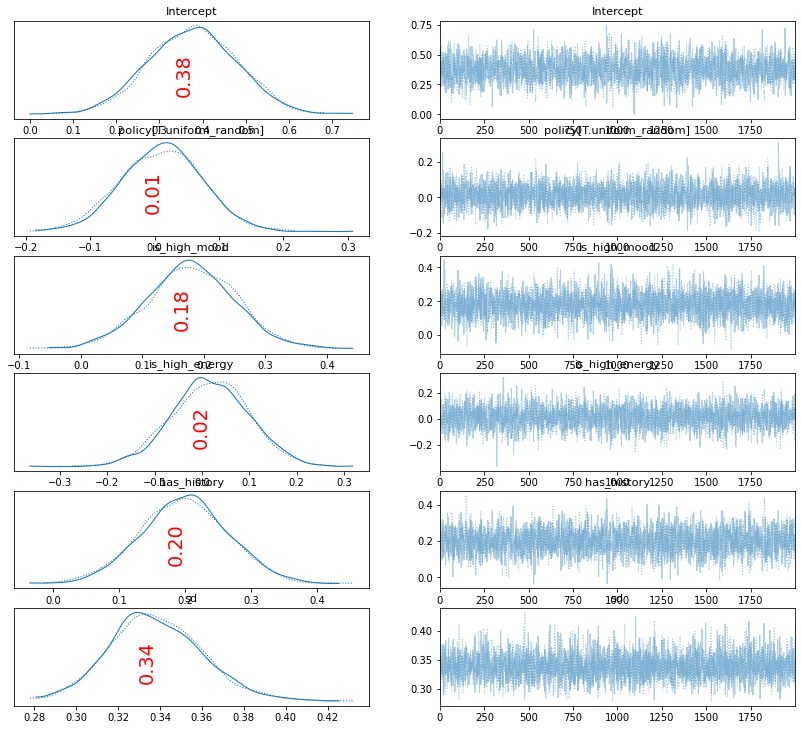

In [ ]:
plot_trace(normal_trace);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


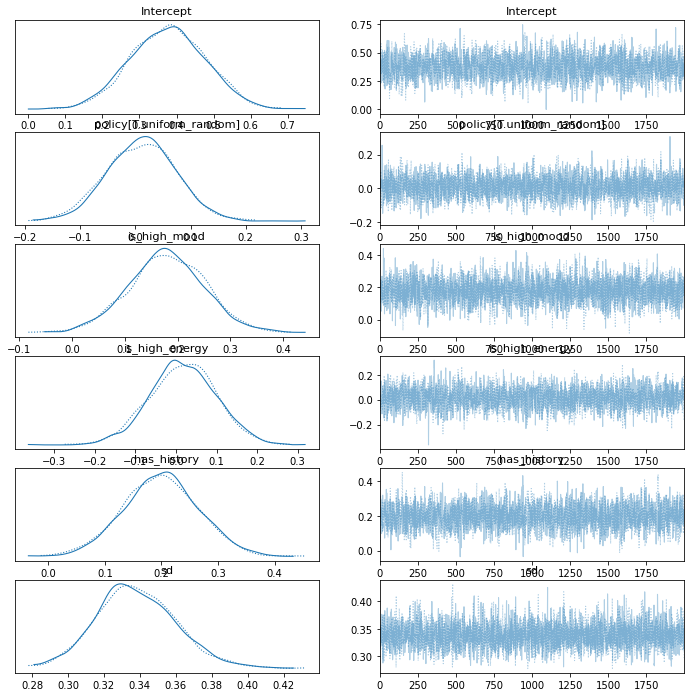

In [ ]:
pm.traceplot(normal_trace);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


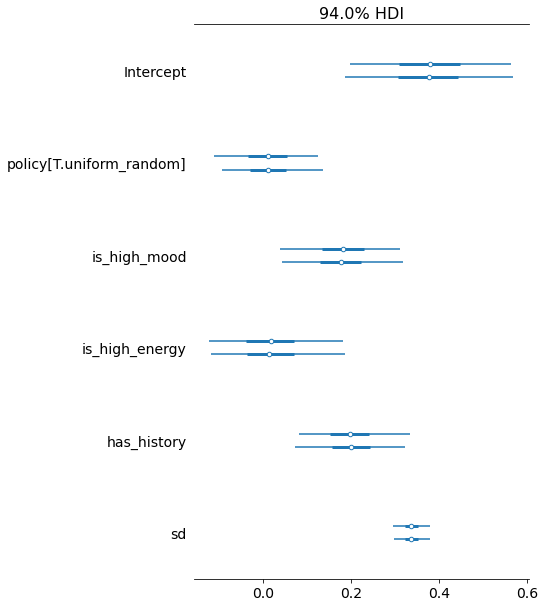

In [ ]:
pm.forestplot(normal_trace);

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


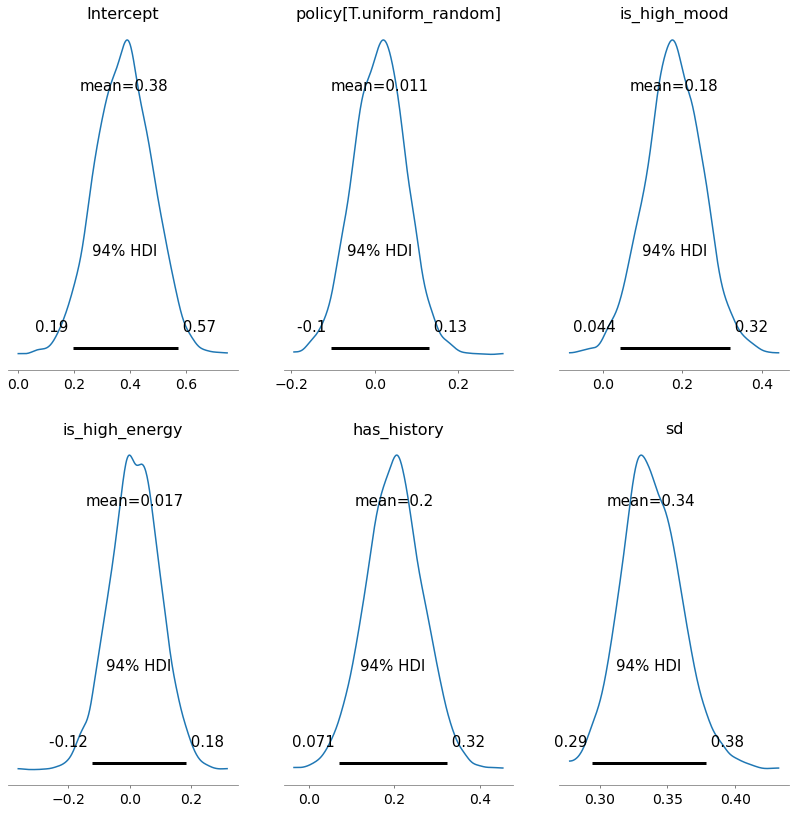

In [ ]:
pm.plot_posterior(normal_trace, figsize = (14, 14));

In [ ]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 0.3771
Variable: policy[T.uniform_random] Mean weight in model: 0.0113
Variable: is_high_mood    Mean weight in model: 0.1793
Variable: is_high_energy  Mean weight in model: 0.0169
Variable: has_history     Mean weight in model: 0.1992
Variable: sd_log__        Mean weight in model: -1.0861
Variable: sd              Mean weight in model: 0.3382


In [ ]:
pm.summary(normal_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.377,0.101,0.195,0.570,0.002,0.002,2232.0,2499.0,1.0
policy[T.uniform_random],0.011,0.063,-0.104,0.130,0.001,0.001,3005.0,2218.0,1.0
is_high_mood,0.179,0.073,0.044,0.319,0.001,0.001,2834.0,2302.0,1.0
is_high_energy,0.017,0.081,-0.122,0.183,0.002,0.001,2735.0,2522.0,1.0
has_history,0.199,0.067,0.071,0.322,0.001,0.001,2785.0,2347.0,1.0
sd,0.338,0.022,0.295,0.378,0.000,0.000,3613.0,2481.0,1.0


In [ ]:
# Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    figsize(6, 6)
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('Reward', size = 16)
    plt.title("Posterior of Reward vs %s" % query_var, size = 18)
    plt.show()

/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


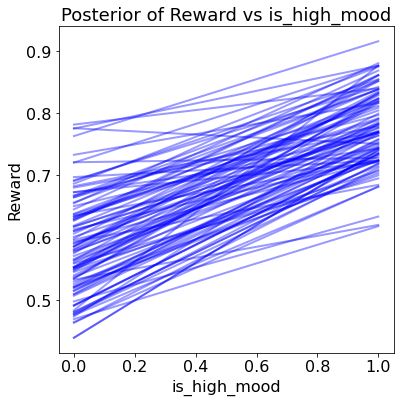

In [ ]:
model_effect('is_high_mood', normal_trace,df.drop(columns=['reward','user_id','arm_text','policy']))

/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


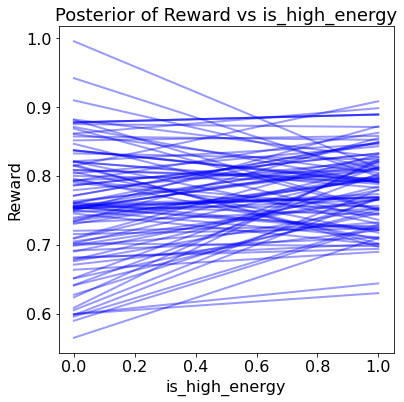

In [ ]:
model_effect('is_high_energy', normal_trace,df.drop(columns=['reward','user_id','arm_text','policy']))

/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


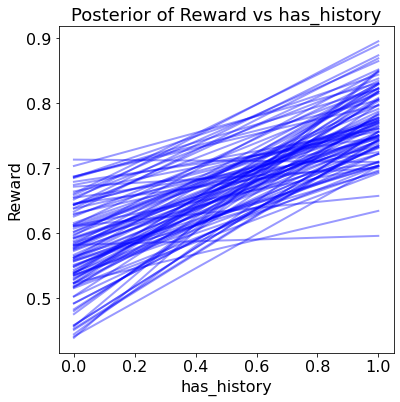

In [ ]:
model_effect('has_history', normal_trace,df.drop(columns=['reward','user_id','arm_text','policy']))